In [1]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import plotly.express as px
import descartes

In [66]:
all_files = glob.glob("temp/*.csv")

ldf = []

for file in all_files:
    ldf.append(pd.read_csv(file))
    
forumDF = pd.concat(ldf, axis=0, ignore_index=True)
forumDF.to_csv('../saved_gen_df/forumDF_full_df.csv', index=None)

In [37]:
check_df = forumDF[['date', 'board', 'nReplies', 'nViews']].groupby(by='date').describe().reset_index().set_index('date')

In [29]:
check_df = check_df.set_axis([f"{x}{y}" for x, y in test.columns], axis=1, inplace=False)

In [33]:
check_df['s'] = forumDF[['date','nReplies']].groupby(by='date').sum()

In [72]:
forumDF['clean_title'] = forumDF['title'].str.replace("[^a-zA-Z#]", " ")
forumDF['clean_title'] = forumDF['clean_title'].astype(str)

In [73]:
import nltk
forumDF['tokens'] = forumDF['clean_title'].apply(lambda x: x.split()) # tokenizing
from nltk.stem.porter import *
stemmer = PorterStemmer()

forumDF['tokens']  = forumDF['tokens'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [74]:
forumDF['tokens']

0          [free, agora, referr, link, get, you, vendor, ...
1          [O, O, O, O, O, O, o, GO, A, phish, link, o, O...
2          [O, O, O, O, O, O, o, GO, A, phish, link, o, O...
3          [sign, up, for, agora, for, free, now, http, a...
4          [free, refer, link, sign, up, now, http, agora...
                                 ...                        
1508594                                  [free, activ, link]
1508595                                  [free, activ, link]
1508596                                  [free, activ, link]
1508597                                  [free, activ, link]
1508598                                  [free, activ, link]
Name: tokens, Length: 1508599, dtype: object

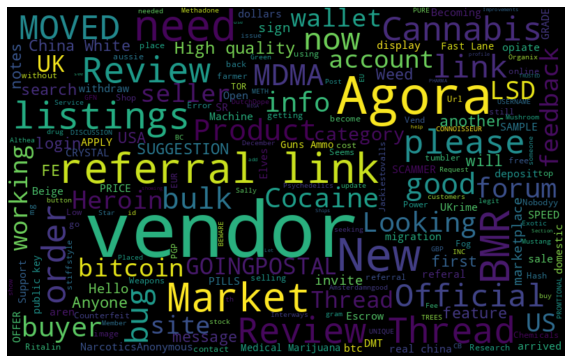

In [78]:
all_words = ' '.join([text for text in forumDF['clean_title'][forumDF['date'] == '2014-01-02']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
test = repliesAndViewsPerDateAndBoard = forumDF[['date', 'board', 'nReplies', 'nViews']].groupby(by=['date', 'board']).describe()

In [4]:
test = test.set_axis([f"{x}{y}" for x, y in test.columns], axis=1, inplace=False)

NameError: name 'test' is not defined

In [88]:
test['board1'], test['board2'] = list(zip(*((x[0][0], x[0][0]) for (x,y) in test['board'].values)))

ValueError: too many values to unpack (expected 2)

In [ ]:
test

In [ ]:
fig, ax1 = plt.subplots( figsize=(20,10))

ax1.set_xlabel('date (d)')
ax1.set_ylabel('ptime Average per day for Agora Market')
ax1.plot(repliesAndViewsPerDateAndBoard.index, repliesAndViewsPerDateAndBoard[('nViews', 'count')])
ax1.tick_params(axis='y')
plt.show()

In [67]:
gapminder = px.data.gapminder()
px.scatter(test.head(1000), x='nRepliesmax',
           y='nViewsmax', animation_frame='date', animation_group="board",
            
           size='nViewscount', color="board",range_x=[1,500000], range_y=[1, 500000], log_y=True, log_x=True)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [('nReplies', 'count'), ('nReplies', 'mean'), ('nReplies', 'std'), ('nReplies', 'min'), ('nReplies', '25%'), ('nReplies', '50%'), ('nReplies', '75%'), ('nReplies', 'max'), ('nViews', 'count'), ('nViews', 'mean'), ('nViews', 'std'), ('nViews', 'min'), ('nViews', '25%'), ('nViews', '50%'), ('nViews', '75%'), ('nViews', 'max')] but received: nRepliesmax

In [6]:
forumDF.groupby(by=['date']).describe()

Unnamed: 0                                                      \
                count    mean          std  min      25%     50%      75%   
date                                                                        
2014-01-02      317.0   158.0    91.654242  0.0    79.00   158.0   237.00   
2014-01-09      419.0   209.0   121.099133  0.0   104.50   209.0   313.50   
2014-01-16      531.0   265.0   153.430766  0.0   132.50   265.0   397.50   
2014-01-26      739.0   369.0   213.475213  0.0   184.50   369.0   553.50   
2014-02-03      871.0   435.0   251.580338  0.0   217.50   435.0   652.50   
...               ...     ...          ...  ...      ...     ...      ...   
2015-05-28     5430.0  2714.5  1567.650312  0.0  1357.25  2714.5  4071.75   
2015-05-29     7074.0  3536.5  2042.232235  0.0  1768.25  3536.5  5304.75   
2015-05-31     5989.0  2994.0  1729.019713  0.0  1497.00  2994.0  4491.00   
2015-06-01     5456.0  2727.5  1575.155865  0.0  1363.75  2727.5  4091.25   
2015-06-02     4040.0  2019.5  1166.391872  0.0  1009.75  2019.5  3029.25   

                   nReplies               ...                   nViews  \
               max    count         mean  ...   75%        max   count   
date                                      ...                            
2014-01-02   316.0    317.0     3.757098  ...   4.0      100.0   317.0   
2014-01-09   418.0    419.0     4.248210  ...   5.0      100.0   419.0   
2014-01-16   530.0    531.0     4.623352  ...   5.0      100.0   531.0   
2014-01-26   738.0    739.0     5.649526  ...   6.0      270.0   739.0   
2014-02-03   870.0    871.0     5.900115  ...   6.5      298.0   871.0   
...            ...      ...          ...  ...   ...        ...     ...   
2015-05-28  5429.0   5430.0  2291.144015  ...   9.0  2653452.0  5430.0   
2015-05-29  7073.0   7074.0  1805.225756  ...   8.0  2666740.0  7074.0   
2015-05-31  5988.0   5989.0  2177.288529  ...   8.0  2688949.0  5989.0   
2015-06-01  5455.0   5456.0  2420.452529  ...   9.0  2703569.0  5456.0   
2015-06-02  4039.0   4040.0  3205.072772  ...  10.0  2711560.0  4040.0   

                                                                              
                   mean           std  min     25%    50%     75%        max  
date                                                                          
2014-01-02    67.324921    107.930262  0.0   22.00   40.0   69.00     1181.0  
2014-01-09    73.618138    113.085022  1.0   24.50   44.0   76.00     1379.0  
2014-01-16    82.745763    124.044200  1.0   27.00   49.0   87.00     1529.0  
2014-01-26    97.381597    255.218070  0.0   28.50   51.0   95.50     5948.0  
2014-02-03   104.652124    303.375227  1.0   31.00   55.0  101.50     7914.0  
...                 ...           ...  ...     ...    ...     ...        ...  
2015-05-28  2504.726703  50802.872369  0.0  261.00  441.0  810.00  3139415.0  
2015-05-29  2086.294741  44965.926407  0.0  231.00  398.0  726.00  3157911.0  
2015-05-31  2387.603106  49341.115838  2.0  235.00  408.0  766.00  3180100.0  
2015-06-01  2608.924304  52038.734692  0.0  266.00  454.0  849.25  3197630.0  
2015-06-02  3187.752723  60256.780898  0.0  335.75  525.5  974.75  3208149.0  

[130 rows x 24 columns]

In [7]:
forum_stat = pd.read_csv('../saved_gen_df/forum_stats_df.csv')

In [8]:
forum_stat= forum_stat.set_index('date')

In [31]:
forum_stat

,Unnamed: 0,members,posts,topics,nOnline,new_posts,days_elapsed,new_members,new_topics
date,,,,,,,,,
2014-01-02,0,678,1508,317,3,1508.0,1.0,678.0,317.0
2014-01-09,1,822,2198,418,3,690.0,7.0,144.0,101.0
2014-01-16,2,1034,3026,539,3,828.0,7.0,212.0,121.0
2014-01-26,3,1344,5039,757,3,2013.0,10.0,310.0,218.0
2014-02-03,4,1550,6137,895,3,1098.0,8.0,206.0,138.0
...,...,...,...,...,...,...,...,...,...
2015-06-26,107,56841,16192657,39173,5,137528.0,4.0,188.0,309.0
2015-06-28,108,57227,16417981,60302,5,225324.0,2.0,386.0,21129.0
2015-06-30,109,57710,16625015,75172,5,207034.0,2.0,483.0,14870.0


In [ ]:
test.tail(1000).max()

In [ ]:
print(test['nViewsmax'].max())
print(test['nRepliesmax'].max())
print(test['nViewsmax'].min())
print(test['nRepliesmax'].min())

In [45]:
forumDF = pd.DataFrame(columns=['title', 'author','nReplies', 'nViews','lastPost', 'date', 'board'])
count_e = os.listdir('../data/agora-forums/2014-01-09/index.php')

for entry in os.scandir('../data/agora-forums/2014-01-09/index.php'):
    count = 0
    with open(entry.path) as fp:
        print(entry.path)
        soup = bs(fp, features="html.parser")
        if(len(soup.find_all('body'))>0):
            board = soup.find_all('body')[0].find_all('div', class_="navigate_section")
        else:
            print(entry.path)
        if(len(board[0].find_all('a'))>=3):
            (board0, board1) = (board[0].find_all('a')[1].text, board[0].find_all('a')[2].text)
        else:
            (board0, board1) = (None, None)
            print(len(board[0].find_all('a')))
        if(len(soup.find_all('tbody'))>0):
            topicList = soup.find_all('tbody')[0].find_all('tr')
            
    count += 1
    
print(count)

AttributeError: 'posix.ScandirIterator' object has no attribute 'entries'